In [12]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
# Leer archivo CSV
df_csv = pd.read_csv('Medicaldataset.csv')
df_csv

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


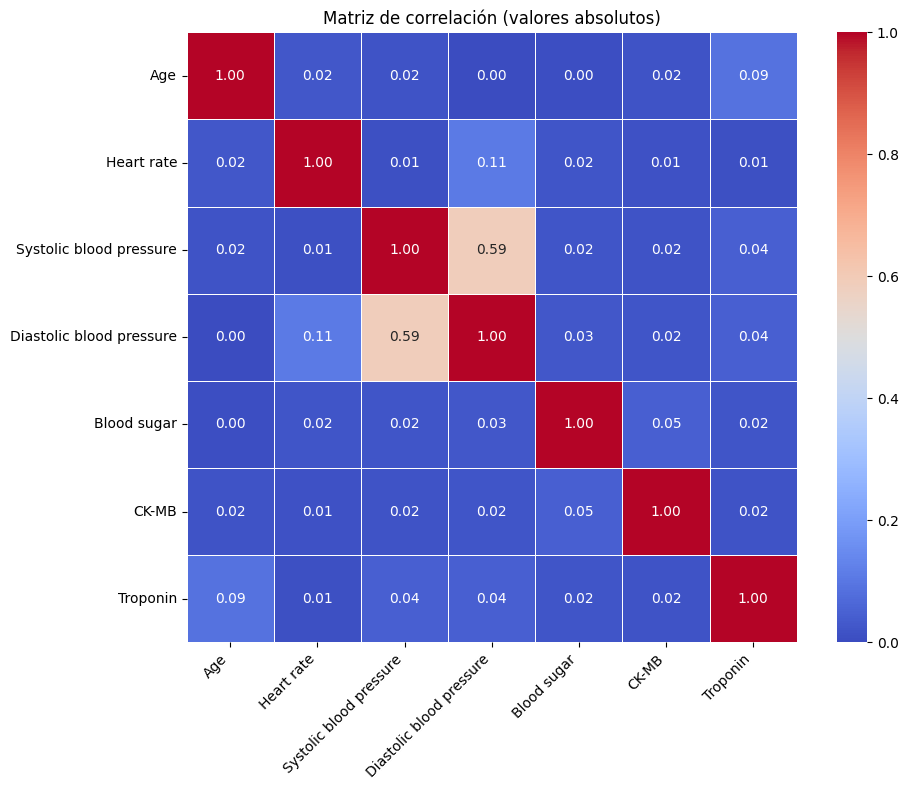

In [15]:
# Calcular la matriz de correlación absoluta
# Variables predictoras y target
variables_numericas = ["Age"    ,   "Heart rate",   "Systolic blood pressure",  "Diastolic blood pressure", "Blood sugar",  "CK-MB",    "Troponin"]

# 2. Calcula la matriz de correlación (valores absolutos)
cor_matrix = df_csv[variables_numericas].corr().abs()

# 3. Dibuja el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cor_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=0, vmax=1,
    square=True,
    linewidths=.5
)
plt.title("Matriz de correlación (valores absolutos)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [2]:
# Leer archivo CSV
df_csv = pd.read_csv('Set_datos_T1_completo.csv')
df_csv

,formacion_academica,estrato_socioeconomico,sexo,edad,desempeno_neurocognitivo,duracion_sueno,consumo_cafe,fc_antes,fc_despues,fr_antes,fr_despues,pas_antes,pad_antes,pas_despues,pad_despues
0,2.5,1.2,Mujer,36,2.8,1,2,87.483571,79.684860,14.649643,14.557451,109.429593,78.925925,104.495644,75.160523
1,4.5,3.0,Mujer,28,2.1,4,3,84.308678,77.459411,15.710963,14.571348,111.845346,66.111595,107.852646,62.038182
2,3.9,3.1,Mujer,54,2.8,4,2,88.238443,83.119182,14.415160,12.828766,110.289699,78.573728,105.634449,75.075038
3,3.1,3.0,Hombre,42,4.0,4,4,92.615149,88.909023,15.384077,11.496389,112.260021,73.831380,105.830557,72.773877
4,4.2,3.0,Hombre,29,3.6,2,4,83.829233,77.432786,12.212771,9.656218,113.929248,78.537289,106.373535,75.692711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.0,4.2,Hombre,59,3.0,4,4,83.594499,76.454198,16.154961,14.126503,113.510666,86.049278,108.307406,81.748176
996,2.4,1.5,Hombre,21,1.6,3,2,93.988433,89.041475,16.515505,16.593317,118.845158,76.634973,111.510723,75.633318
997,4.4,5.0,Hombre,23,4.0,3,4,88.204214,84.967964,13.516479,11.836777,112.363055,70.824377,104.186160,68.529694
998,3.8,3.5,Mujer,32,1.8,4,1,82.144105,77.470239,16.668353,13.024975,114.974467,83.264565,111.344441,79.768800


## **<span style="color:#1a73e8;">Variables Cuantitativas VS Cualitativas</span>**

### **<span style="color:#1a73e8;">Diagrama de caja (Boxplot):</span>**

In [3]:
def boxplot_by_group(df, quantitative_col, categorical_col):
    """
    Crea un boxplot por grupo usando Plotly.

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame que contiene las variables.
    quantitative_col : str
        Nombre de la columna cuantitativa (numérica).
    categorical_col : str
        Nombre de la columna cualitativa (categórica).
    title : str
        Título del gráfico.

    Retorna:
    --------
    fig : plotly.graph_objects.Figure
        Objeto figura interactiva.
    """
    fig = px.box(
        df,
        x=categorical_col,
        y=quantitative_col,
        color=categorical_col,
        title='Boxplot por grupo',
        points="outliers",  # muestra los puntos outliers
        template="plotly_white"
    )

    fig.update_layout(
        xaxis_title=categorical_col,
        yaxis_title=quantitative_col,
        font=dict(size=14),
        title_font_size=16
    )

    fig.show()

In [4]:
boxplot_by_group(df_csv, 'desempeno_neurocognitivo', 'sexo')

### **<span style="color:#1a73e8;">Histogramas por categoría:</span>**

In [5]:
def graficar_histograma(df, variable, grupo):
    """
    Muestra un histograma para una variable cuantitativa agrupada por una variable categórica.
    Imprime el número de bins y las frecuencias por intervalo.
    """
    # Eliminar NaNs
    data = df[variable].dropna()

    # Cálculo de IQR y bins (Freedman–Diaconis)
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    n = len(data)
    ancho_bin = 2 * iqr / (n ** (1/3))
    num_bins = int(np.ceil((data.max() - data.min()) / ancho_bin)) if ancho_bin > 0 else 20

    # Calcular frecuencias
    frecuencias, bordes = np.histogram(data, bins=num_bins)
    print(f"\n\033[1mNúmero de bins:\033[0m {num_bins}")
    print("\033[1mFrecuencias por intervalo:\033[0m")
    for i in range(len(frecuencias)):
        print(f"[{bordes[i]:.2f}, {bordes[i+1]:.2f})\t\t{frecuencias[i]}")

    # Paleta pastel
    num_grupos = df[grupo].nunique()
    pastel = sns.color_palette("pastel", n_colors=num_grupos)

    # Graficar
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=variable, hue=grupo, kde=True, palette=pastel, bins=num_bins, alpha=0.7)
    plt.title(f"Histograma de {variable} por grupo {grupo}", fontsize=14)
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


Número de bins: 17
Frecuencias por intervalo:
[1.00, 1.24)		61
[1.24, 1.47)		33
[1.47, 1.71)		86
[1.71, 1.94)		77
[1.94, 2.18)		76
[2.18, 2.41)		150
[2.41, 2.65)		106
[2.65, 2.88)		69
[2.88, 3.12)		132
[3.12, 3.35)		76
[3.35, 3.59)		42
[3.59, 3.82)		50
[3.82, 4.06)		14
[4.06, 4.29)		15
[4.29, 4.53)		7
[4.53, 4.76)		3
[4.76, 5.00)		3


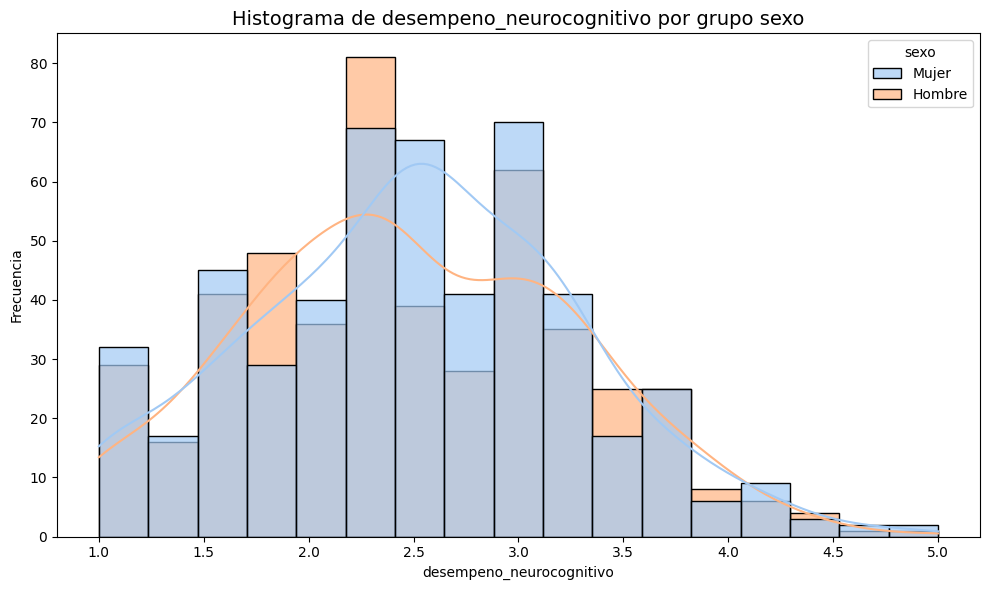

In [6]:
graficar_histograma(df_csv, 'desempeno_neurocognitivo', 'sexo')

In [7]:
def graficar_histograma_y_boxplot(df, variable, grupo):
    """
    Muestra boxplot e histograma para una variable cuantitativa agrupada por una cualitativa.
    Imprime el número de bins y las frecuencias por intervalo.
    """
    # Eliminar NaNs
    data = df[variable].dropna()

    # Cálculo de IQR y bins (Freedman–Diaconis)
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    n = len(data)
    ancho_bin = 2 * iqr / (n ** (1/3))
    num_bins = int(np.ceil((data.max() - data.min()) / ancho_bin)) if ancho_bin > 0 else 20

    # Calcular frecuencias
    frecuencias, bordes = np.histogram(data, bins=num_bins)
    print(f"\n\033[1mNúmero de bins:\033[0m {num_bins}")
    print("\033[1mFrecuencias por intervalo:\033[0m")
    for i in range(len(frecuencias)):
        print(f"[{bordes[i]:.2f}, {bordes[i+1]:.2f})\t\t{frecuencias[i]}")

    num_grupos = df[grupo].nunique()
    pastel = sns.color_palette("pastel", n_colors=num_grupos)

    # Gráficos
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [0.4, 1]})

    sns.boxplot(data=df, x=variable, y=grupo, hue=grupo, palette=pastel, ax=axes[0])
    axes[0].set_title(f"Boxplot de {variable} por grupo {grupo}")

    sns.histplot(data=df, x=variable, hue=grupo, palette=pastel, kde=True, bins=num_bins, alpha=0.7, ax=axes[1])
    axes[1].set_title(f"Histograma de {variable} por grupo {grupo}")
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel("Frecuencia")

    sns.despine(left=True)
    plt.tight_layout()
    plt.show()


Número de bins: 17
Frecuencias por intervalo:
[1.00, 1.24)		61
[1.24, 1.47)		33
[1.47, 1.71)		86
[1.71, 1.94)		77
[1.94, 2.18)		76
[2.18, 2.41)		150
[2.41, 2.65)		106
[2.65, 2.88)		69
[2.88, 3.12)		132
[3.12, 3.35)		76
[3.35, 3.59)		42
[3.59, 3.82)		50
[3.82, 4.06)		14
[4.06, 4.29)		15
[4.29, 4.53)		7
[4.53, 4.76)		3
[4.76, 5.00)		3


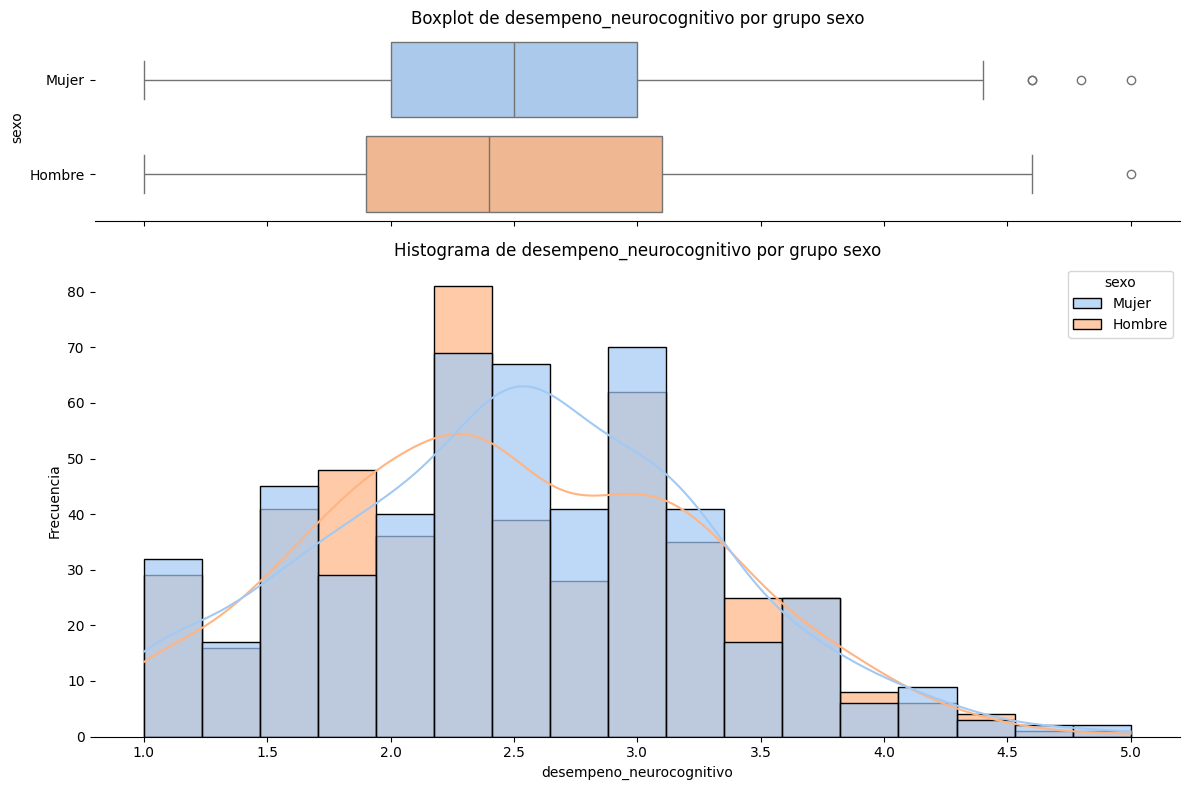

In [8]:
graficar_histograma_y_boxplot(df_csv, 'desempeno_neurocognitivo', 'sexo')

### **<span style="color:#1a73e8;">Diagrama de densidad por categoría:</span>**

In [9]:
def graficar_densidad(df, variable, grupo):
    """
    Muestra un diagrama de densidad (KDE) para una variable cuantitativa,
    agrupada por una variable categórica usando `hue`.
    """
    # Eliminar NaNs
    data = df[[variable, grupo]].dropna()

    # Paleta pastel
    num_grupos = data[grupo].nunique()
    pastel = sns.color_palette("pastel", n_colors=num_grupos)

    # Graficar
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x=variable, hue=grupo, fill=True, palette=pastel, alpha=0.5)
    plt.title(f"Densidad de {variable} por grupo {grupo}", fontsize=14)
    plt.xlabel(variable)
    plt.ylabel("Densidad")
    plt.tight_layout()
    plt.grid(True)  
    plt.show()

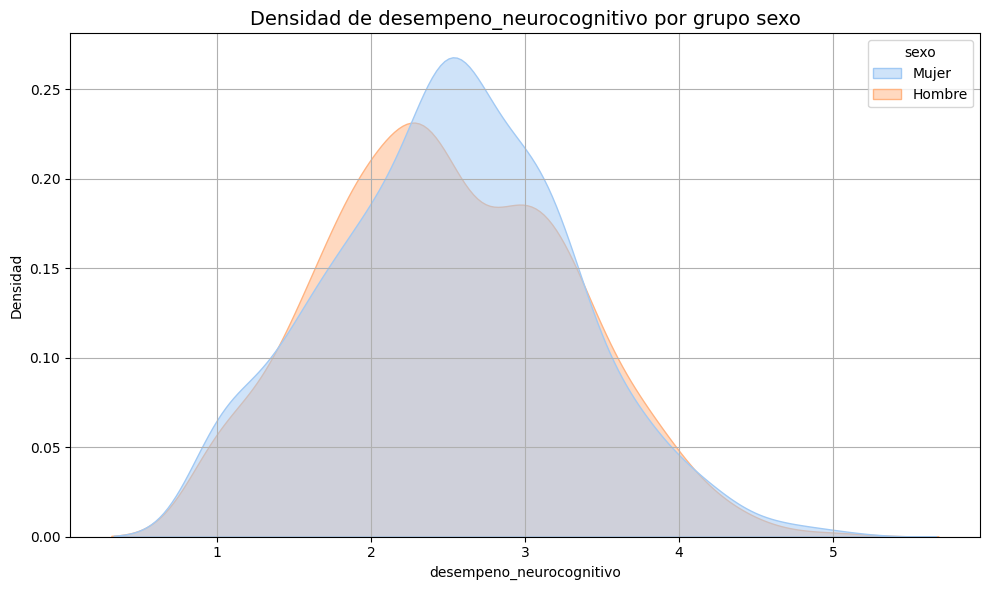

In [10]:
graficar_densidad(df_csv, 'desempeno_neurocognitivo', 'sexo')

### **<span style="color:#1a73e8;">Gráficos de violín (Violin plots):</span>**

In [11]:
def graficar_diagrama_violin_plotly(df, variable, grupo):
    """
    Muestra un diagrama de violín (con boxplot incluido) usando Plotly,
    con colores pastel automáticos según número de grupos.

    Parámetros:
    - df: DataFrame con los datos.
    - variable: Columna numérica (eje Y).
    - grupo: Columna categórica para agrupar (eje X).
    """
    # Limpiar datos nulos
    datos = df[[variable, grupo]].dropna()

    # Obtener número de grupos y colores pastel
    num_grupos = datos[grupo].nunique()
    pastel_colores = sns.color_palette("pastel", n_colors=num_grupos).as_hex()

    # Graficar
    fig = px.violin(datos,
                    x=grupo,
                    y=variable,
                    box=True,               # Mostrar boxplot
                    points="outliers",           # Mostrar los puntos outliers
                    color=grupo,
                    color_discrete_sequence=pastel_colores)

    fig.update_layout(
        title=f"Distribución de {variable} por grupo {grupo}",
        xaxis_title=grupo,
        yaxis_title=variable,
        template="plotly_white"
    )

    fig.show()

In [84]:
graficar_diagrama_violin_plotly(df_csv, 'desempeno_neurocognitivo', 'sexo')

### **<span style="color:#1a73e8;">Gráfico de Dispersión por Categoría (1 Variable Cuantitativa vs. 1 Cualitativa):</span>**

In [85]:
def scatter_por_grupo(df, variable_cuantitativa, variable_grupo):
    """
    Grafica un diagrama de dispersión de una variable cuantitativa por grupos (variable categórica),
    separando por colores para cada grupo.

    Parámetros:
    - df: DataFrame con los datos
    - variable_cuantitativa: Nombre de la variable numérica (str)
    - variable_grupo: Nombre de la variable categórica (str)
    """
    fig = px.strip(
        df,
        x=variable_grupo,
        y=variable_cuantitativa,
        color=variable_grupo,
        stripmode='overlay',  # para que se vean todos los puntos juntos por grupo
        color_discrete_sequence=px.colors.qualitative.Pastel
    )

    fig.update_traces(jitter=0.35, marker=dict(size=8, opacity=0.7))  # separación horizontal para ver los puntos
    fig.update_layout(
        title=f"Diagrama de puntos de {variable_cuantitativa} por grupos de {variable_grupo}",
        template="plotly_white",
        xaxis_title=variable_grupo.capitalize(),
        yaxis_title=variable_cuantitativa.capitalize()
    )

    fig.show()

In [86]:
scatter_por_grupo(df_csv, 'desempeno_neurocognitivo', 'sexo')

## **<span style="color:#1a73e8;">Variables Cualitativa vs. Cualitativa</span>**

In [87]:
def plot_categorical_vs_categorical(df, cat_var, group_var):
    """
    Muestra un gráfico de barras agrupadas + tabla de contingencia.
    """
    # Convertir a string para evitar problemas de color
    df[group_var] = df[group_var].astype(str)

    # Tabla de contingencia
    contingencia = pd.crosstab(df[cat_var], df[group_var])
    print("Tabla de contingencia:")
    display(contingencia)  # Si estás en Jupyter/Colab, usa display()

    # Calcular frecuencias para el gráfico
    counts = df.groupby([cat_var, group_var], observed=False).size().reset_index(name='Frecuencia')

    pastel_colors = ["#b5ead7", "#ffdac1", "#c7ceea", "#ffdd99", "#c2e0ff"]

    # Gráfico de barras
    fig = px.bar(counts,
                 x=cat_var,
                 y='Frecuencia',
                 color=group_var,
                 barmode='group',
                 color_discrete_sequence=pastel_colors)

    fig.update_layout(
        title=f"Frecuencia de {cat_var} según {group_var}",
        xaxis_title=cat_var,
        yaxis_title="Frecuencia",
        template="plotly_white"
    )

    fig.show()

In [88]:
plot_categorical_vs_categorical(df_csv, 'sexo', 'consumo_cafe')

Tabla de contingencia:


consumo_cafe,1,2,3,4
sexo,,,,
Hombre,47,287,96,55
Mujer,47,312,102,54


## **<span style="color:#1a73e8;">Variables Cuantitativas vs. Cuantitativas</span>**

In [90]:
def scatter_dos_cuantitativas(df, x_var, y_var):
    """
    Crea un gráfico de dispersión entre dos variables cuantitativas, opcionalmente
    coloreado por una variable categórica.

    Parámetros:
    - df: DataFrame con los datos
    - x_var: nombre de la variable en el eje x (str)
    - y_var: nombre de la variable en el eje y (str)
    """
    fig = px.scatter(
        df,
        x=x_var,
        y=y_var,
        color_discrete_sequence=px.colors.qualitative.Set2,
        opacity=0.7
    )

    fig.update_traces(marker=dict(size=7, line=dict(width=0)))
    fig.update_layout(
        title=f'Dispersión: {y_var} vs {x_var}',
        xaxis_title=x_var,
        yaxis_title=y_var,
        template='plotly_white'
    )
    fig.show()

In [91]:
scatter_dos_cuantitativas(df_csv, 'fc_antes', 'fc_despues')

## **<span style="color:#1a73e8;">Covarianza</span>**

In [92]:
def calcular_covarianza(df, var1, var2):
    """
    Calcula la covarianza entre dos variables cuantitativas y la grafica si se desea.

    Parámetros:
    - df: DataFrame con los datos
    - var1: nombre de la primera variable (str)
    - var2: nombre de la segunda variable (str)
    - graficar: si True, muestra gráfico de dispersión con tendencia (bool)
    
    Retorna:
    - valor de la covarianza
    """
    
    # Quitamos nulos para evitar errores
    datos = df[[var1, var2]].dropna()

    # Cálculo de covarianza
    cov = np.cov(datos[var1], datos[var2])[0, 1]

    print(f"📊 La covarianza entre '{var1}' y '{var2}' es: {cov:.4f}")

   
    fig = px.scatter(
        datos,
        x=var1,
        y=var2,
        trendline="ols",  # Línea de regresión para ver tendencia
        title=f"Dispersión de {var1} vs {var2} (Covarianza = {cov:.2f})",
        labels={var1: var1, var2: var2},
        template="plotly_white"
    )
    fig.show()
    
    return cov

In [93]:
calcular_covarianza(df_csv, 'fc_antes', 'fc_despues')

📊 La covarianza entre 'fc_antes' y 'fc_despues' es: 24.3662


24.36619126493116

## **<span style="color:#1a73e8;">Correlación</span>**

In [94]:
def graficar_matrices_correlacion(df, variables):
    """
    Calcula y grafica las matrices de correlación de Pearson y Spearman.

    Parámetros:
    - df: DataFrame con los datos.
    - variables: Lista de nombres de columnas numéricas.
    """

    # Calcular las matrices de correlación
    matriz_pearson = df[variables].corr(method="pearson")
    matriz_spearman = df[variables].corr(method="spearman")

    # Función para graficar
    def graficar_heatmap(matriz, titulo):
        plt.figure(figsize=(8, 7))
        sns.heatmap(
            matriz,
            annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-1, vmax=1, cbar_kws={"shrink": 0.8}
        )
        plt.title(titulo, fontsize=12)
        plt.xticks(rotation=45, ha = 'right', fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.tight_layout()
        plt.show()

    # Mostrar las dos gráficas
    graficar_heatmap(matriz_pearson, "Matriz de Correlación de Pearson")
    graficar_heatmap(matriz_spearman, "Matriz de Correlación de Spearman")

In [95]:
df_csv.columns

Index(['formacion_academica', 'estrato_socioeconomico', 'sexo', 'edad',
       'desempeno_neurocognitivo', 'duracion_sueno', 'consumo_cafe',
       'fc_antes', 'fc_despues', 'fr_antes', 'fr_despues', 'pas_antes',
       'pad_antes', 'pas_despues', 'pad_despues'],
      dtype='object')

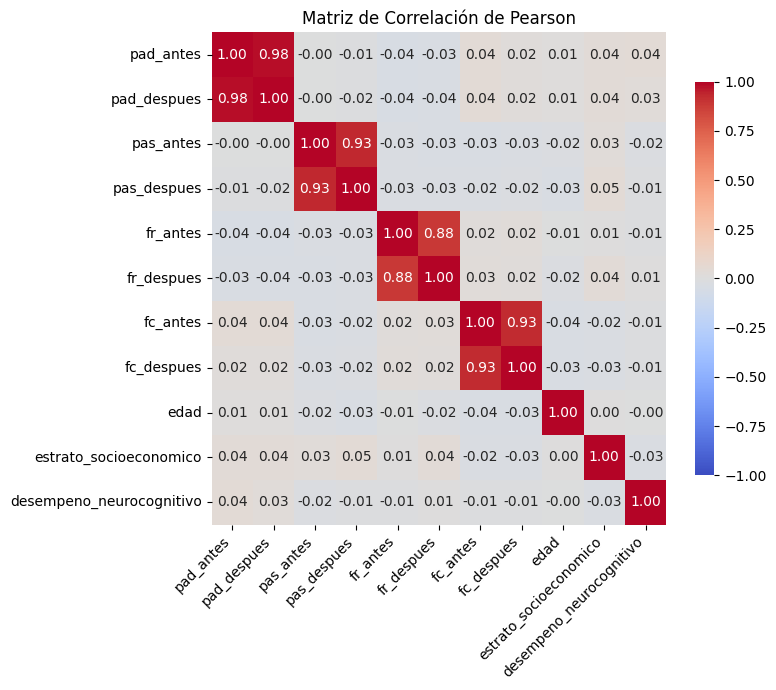

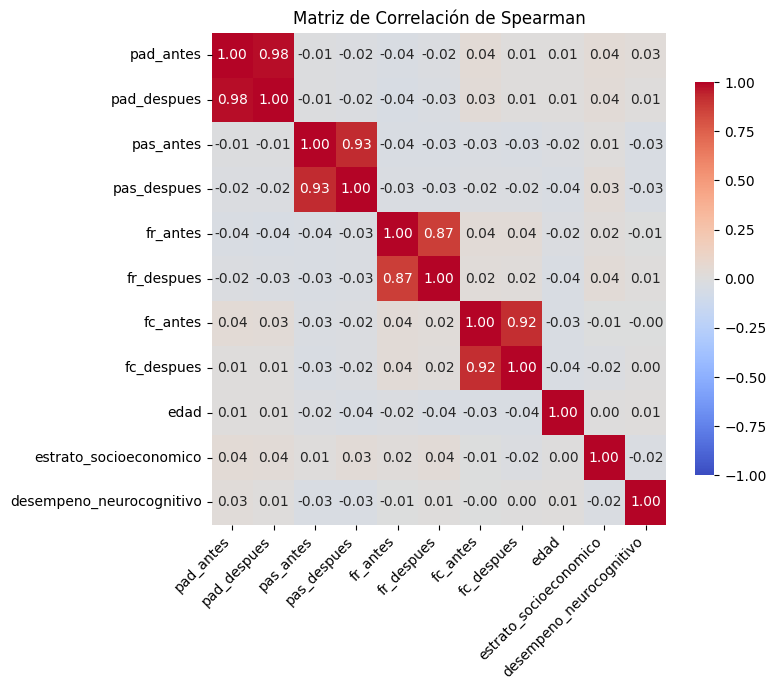

In [96]:
variables = ['pad_antes', 'pad_despues', 'pas_antes', 'pas_despues', 'fr_antes', 'fr_despues', 'fc_antes', 'fc_despues', 'edad', 'estrato_socioeconomico', 'desempeno_neurocognitivo']

graficar_matrices_correlacion(df_csv, variables)